- loading CIFAR10 data

In [1]:
from torchvision.datasets import CIFAR10
train_data = CIFAR10(root="./train/",
                     train=True,
                     download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./train/cifar-10-python.tar.gz to ./train/


In [2]:
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train


In [3]:
len(train_data)

50000

In [7]:
train_data.data.shape

(50000, 32, 32, 3)

In [9]:
(train_data.targets)

50000

In [10]:
type(train_data)

torchvision.datasets.cifar.CIFAR10

In [11]:
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
train_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [13]:
type(train_data[0])

tuple

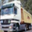

In [29]:
train_data[1][0]#truck

In [30]:
data,label =  train_data[1]

In [31]:
train_data.classes[label]#return the name

'truck'

In [32]:
test_data = CIFAR10(root="./test/",
                    train=False,
                    download=True)

print(test_data)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./test/cifar-10-python.tar.gz to ./test/
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test


In [33]:
print(len(test_data))

10000


In [34]:
print(test_data.data.shape) # ndarray

(10000, 32, 32, 3)


In [35]:
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train


In [36]:
print(train_data.transforms)

None


In [37]:
from torchvision import transforms
train_transforms = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=(0.4914, 0.4822, 0.4465),
      std=(0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="./train/",
                     train=True,
                     download=True,
                     transform=train_transforms) 

Files already downloaded and verified


In [38]:
print(train_data.transforms)

StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [39]:
data,label = train_data[0]
print(type(data))
print(data.size())
print(data)

<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[-2.4291, -2.4291, -2.4291,  ..., -0.0835, -0.1223, -0.4324],
         [-2.4291, -2.4291, -2.4291,  ..., -0.1029, -0.3549, -0.7232],
         [-2.4291, -2.4291, -2.4291,  ...,  0.0716, -0.3355, -0.5875],
         ...,
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],

        [[-2.4183, -2.4183, -2.4183,  ..., -0.8646, -0.8646, -1.1006],
         [-2.4183, -2.4183, -2.4183,  ..., -0.8449, -1.0809, -1.3562],
         [-2.4183, -2.4183, -2.4183,  ..., -0.7072, -1.0809, -1.2579],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183]],

        [[-2.2214, -2.2214, -2.2214,  ..., -1.4215, -1.4410, -1.5971]

In [45]:
from torchvision import transforms
import torchvision
test_transforms = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

test_data = torchvision.datasets.CIFAR10(
      root="./test/",
      train=False,
      transform=test_transforms)

print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [48]:
import torch
trainloader = torch.utils.data.DataLoader(
                    train_data,
                    batch_size=16,
                    shuffle=True)

In [49]:
trainloader

In [50]:
data_batch, labels_batch = next(iter(trainloader))
print(data_batch.size())
print(labels_batch.size())

torch.Size([16, 3, 32, 32])
torch.Size([16])


In [51]:
testloader = torch.utils.data.DataLoader(
                    test_data,
                    batch_size=16,
                    shuffle=False)